# EEEN30101 Numerical Analysis

# Week 04 - Part 01

***&copy; 2024 Martínez Ceseña — University of Manchester, UK***

This notebook introduces covers the first half of the contents presented in week 04. To be more specific, the notebook addresses:
- Basics of optimisation
- The golden section search as a means to search for local optima
- Optimisations of multidimensional problems with quadratic costs

The use of the notebooks is optional and will not be marked. That said, you are strongly encouraged to play with the tools and examples, as you can explore different variations of the examples, which will better prepare you for the exams.

## List of contents

- [Introduction to optimisation](#Introduction-to-optimisation)
  - [Background](#Background)
  - [Our first optimisation](#Our-first-optimisation)
  - [Local and global optima](#Local-and-global-optima)


- [Golden section search](#Golden-section-search)
  - [Searching for a local optimum](#Searching-for-a-local-optimum)
  - [The golden ratio](#The-golden-ratio)
  - [Algorithm and examples](#Algorithm-and-examples)


- [Multidimensional quadratic cost](#Multidimensional-quadratic-cost)
  - [Defining a multidimensional optimisation problem](#Defining-a-multidimensional-optimisation-problem)
  - [Deriving the gradient equation](#Deriving-the-gradient-equation)
  - [Solving the multidimensional problem](#Solving-the-multidimensional-problem)


- [Conclusion](#Conclusion)

## Before we begin

Before we begin: 
- Make sure to review the asynchronous materials provided in blackboard for EEEN30101 Week 4 
- If you have any questions, please post them in the discussion boards or, if that is not possible, send an email to alex.martinezcesena@manchester.ac.uk

This notebook provides some examples in python, for that purpose the following libraries will be loaded:

In [1]:
import math  # To use mathematical operation
import numpy as np  # To define and use matrices
import matplotlib
import matplotlib.pyplot as plt  # To plot figures
import copy

# To create an interface to the code
try:
    import ipywidgets as widgets
except:
    import micropip
    await micropip.install('ipywidgets')
    import ipywidgets as widgets
from ipywidgets import interact

# Enable figure widget
%matplotlib widget

[Back to top](#EEEN30101-Numerical-Analysis)

## Introduction to optimisation

This section provides a brief introduction to unconstrained single variable optimisation. For this purpose, we will first analyse the differences between simulations and optimisations, perform a simple unconstrained optimisation, and increase the complexity of the optimisation problem to illustrate the concepts of local and global optima.

### Background

Most of the problems you have solved so far are based on simulations, where you follow a set of steps to find a solution.

For example, assume that your annual energy costs ($J(x)$) are £500 per year.

However, you were told that, if you buy a number of energy efficient light bulbs ($x$) every year, your energy costs (including the costs of the bulbs) can be modelled with the following equation:

$$ J(x) = 500 - 24x + 2x^2$$

In [2]:
K1 = [500, -24, 2]

Consider that you decide to buy 10 energy efficient light bulbs per year ($x=10$). What would your energy costs be?

In [3]:
x = [10]

- To find the solution, you would populate the equation using the number of light bulbs ($x=10$) that you have selected:

$$ J(x) = 500 - 24(10) + 2(10)^2 $$

- Solving the equation provides the solution:

$$ J(x) = 500 - 240 + 200 = £460$$

In [4]:
def polynomial(x=[1], K=[1, 1]):
    '''Simulate value of polynomial'''
    s1 = len(x)
    s2 = len(K)
    y = np.zeros((s1))
    for i in range(s1):
        for j in range(s2):
            y[i] += K[j]*x[i]**j

    return y

print('J(x) = ', polynomial(x, K1))

J(x) =  [460.]


This problem is straightforward because we were told the number of light bulbs that we have to buy per year ($x=10$) in this cases. However: 
- Is this the best solution?
- How many light bulbs should we buy to minimise our energy costs?

To answer these questions, we can perform an optimisation.

Let us define the optimisation problem mathematically.

Firstly, we can define our costs as a function of real numbers (e.g., you cannot have $1+j2$ devices).

$$
\begin{aligned}
  J(x):\mathbb{R} \longrightarrow \mathbb{R} & \quad x \epsilon \mathbb{R}\\
   & \quad J(x) \epsilon \mathbb{R}
\end{aligned}
$$

Afterwards, we define the optimal solution, called **global minimum** $x^*$ as:

$$J(x) \geq J(x^*) \quad \forall x$$

$$
\begin{aligned}
  J(x*) = & \; min \; J(x)\\
   & \; x \epsilon \mathbb{R}
\end{aligned}
$$

$$
\begin{aligned}
  x^* = & \; arg \; min \; J(x)\\
   & \; x \epsilon \mathbb{R}
\end{aligned}
$$

[Back to top](#EEEN30101-Numerical-Analysis)

### Our first optimisation

Let us now try to optimise our example. That is, to find $x^*$.

For illustrative purposes, we can plot our cost function, which would be called **objective function** in an optimisation problem:

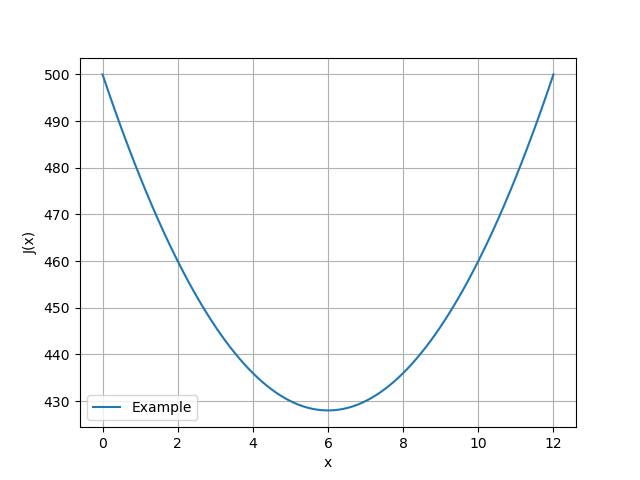

In [5]:
def plotFigure(X, Y, Label=[], xlabel='x', ylabel='J(x)', ax=math.nan):
    '''Plot a figure'''
    if ax.__class__ == math.nan.__class__:
        fig, ax = plt.subplots()

    for i in range(X.shape[0]):
        line, = ax.plot(X[i], Y[i], label=Label[i])

    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.grid()
    if '_child' not in line.get_label():
        plt.legend()
    plt.show()

X = np.zeros((1,100))
Y = np.ones((1,100))
X[0] = np.linspace(0,12,100)
Y[0] = polynomial(X[0], K1)
plotFigure(X, Y, ['Example'])

From the figure, there is a clear global minimum, but how can we formulate an algorithm to find it?

For this purpose, we will use two concepts that you should be familiar with:
- Differential equations, and
- Root finding algorithms

Let us plot the figure again, but now alongside its derivative with respect to $x$.

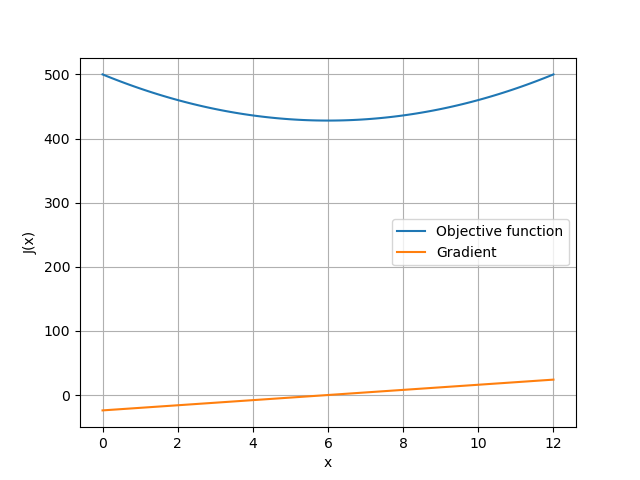

In [6]:
def diffPoly(K):
    '''Differentiate polynomial'''
    s = len(K)    
    if s == 1:
        return [0]
    else:
        s -= 1
        dK = np.zeros(s)
        for i in range(s):
            dK[i] = K[i+1]*(i+1)
        return dK

X = np.zeros((2,100))
Y = np.ones((2,100))
X[0] = np.linspace(0,12,100)
X[1] = np.linspace(0,12,100)
Y[0] = polynomial(X[0], K1)
Y[1] = polynomial(X[0], diffPoly(K1))
plotFigure(X, Y, ['Objective function', 'Gradient'], 'x', 'J(x)')

From the figure, we can deduce that the global minimum ($x^*$) can be found when the differential of the objective function with respect to $x$ (the gradient) is equal to zero:

$$ J'(x^*) = 0 $$

In other words, $x^*$ is a root of $J'(x^*)$ and it can be found with one of the root finding algorithms that we have been discussing over the last few weeks.

For example, we can solve this problem using Newton's method:

$$x_{k+1} = x_k-\frac{f(x)}{f'(x)}$$

where $f(x) = J'(x)$ and therefore we can rewrite the equation as:

$$x_{k+1} = x_k-\frac{J'(x)}{J''(x)}$$

Let us try to optimise our problem using Newton's approach. Try different initial guesses using the python method below:

In [7]:
def TestNewton(x, K):
    Threshold = 0.0001
    
    dJ = diffPoly(K)
    ddJ =diffPoly(dJ)
    
    iteration = 0
    Error = 1000
    while Error > Threshold:
        fx = polynomial([x], dJ)
        dfx = polynomial([x], ddJ)

        x = x-fx[0]/dfx[0]
        Error = abs(polynomial([x], dJ))

        if iteration > 100:
            Error = 0
        iteration += 1
    print('\nA root of J\'(x) = ', x)
    print('Found after %d iterations'%iteration)
    
    return x

@interact
def TestNewton1(x = widgets.FloatSlider(min=0, max=20, value=10, description='Initial guess: ', continuous_update=False)):
    TestNewton(x, K1)

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Initial guess: ', max=20.0…

Based on the results of the simulations of this simple problem, we can conclude:
- Finding the solution is straightforward, as only a single iteration is needed (i.e., a direct method can be used)
- There is a single minimum value for $J(x)$, and thus we can guarantee that the solution found is the **global optimum**.
- The optimisation problem is linear (i.e., $J'(x)$ is a linear function).

><mark>Linear optimisations are a special case of problems that allow us to guarantee a global optimal solution</mark>

However, in reality, problems tend to be more complex and may require the use of highly nonlinear equations.

[Back to top](#EEEN30101-Numerical-Analysis)

### Local and global optima

To illustrate the concept of local and global minimum, consider the equation below, which is a bit more complex than the one used in our previous example:

$$J(x) = 40 - 30x + 30x^2 -10x^3 + x^4$$

Analyse the equation and its gradient using the figure below:

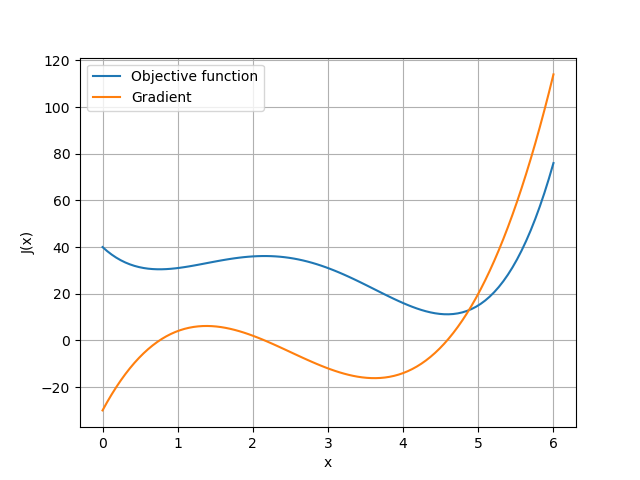

In [8]:
K2 = [40, -30, 30, -10, 1]

X = np.zeros((2,100))
Y = np.ones((2,100))
X[0] = np.linspace(0,6,100)
X[1] = np.linspace(0,6,100)
Y[0] = polynomial(X[0], K2)
Y[1] = polynomial(X[0], diffPoly(K2))
plotFigure(X, Y, ['Objective function', 'Gradient'], 'x', 'J(x)')

It can be seen from the figure that the new objective function has multiple roots which correspond to:
- both valleys and summits of the objective function
- points where the gradient is equal to zero

Try to optimise the new problem using Newton's method.

In [9]:
@interact
def TestNewton1(x = widgets.FloatSlider(min=0, max=6, value=3,
                                        description='Initial guess: ',
                                        continuous_update=False)):
    x = TestNewton(x, K2)
    if polynomial([x], K2) > polynomial([x+0.0001], K2):
        print('This is a local maximum, wrong result')
    else:
        print('This is a local minimum, is it global?')

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='Initial guess: ', max=6.0),…

Based on the outputs of the simulation, you may deduce that the optimisation tends to get **stuck** in wrong solution.

If the result corresponds to a summit (local maximum), we can deduce that it is a wrong solution and search for other results.

$$J(x) > J(x + \delta) \quad \text{local maximum}$$

However, if the result corresponds to a valley (local minimum), it is difficult to know if the solution is a global or a local minimum.

$$J(x) < J(x + \delta) \quad \text{local miniimum}$$

***Note that $\delta$ is a small number (e.g., 0.0001).***

><mark>Often, it is easy to find a local minimum</mark>

><mark>It is hard to guarantee we have found a global optimum $x^*$</mark>

[Back to top](#EEEN30101-Numerical-Analysis)

## Golden section search

Golden section searches are used to find a local optimum (or the global optimum) of a nonlinear optimisation, as long as it is within the range selected for the search.

This section will present the basic theory to search for local optima, introduce the golden ratio as an efficient approach to guide our search, and present a golden section search with some examples.

### Searching for a local optimum

To Illustrate the use of golden section search, let us consider an example. Assume you have the following information:
- A range denoted by a lower ($\underline{x}$) and upper ($\bar{x}$) limit.
- The corresponding values for a $J(x)$ function, i.e., $J(\underline{x})$ and $J(\bar{x})$,

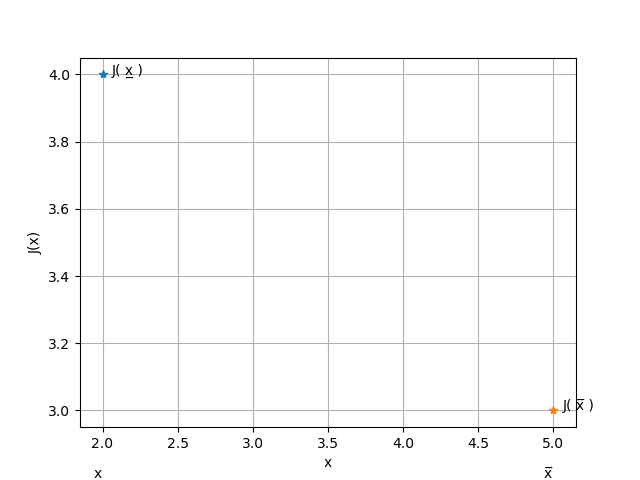

In [10]:
def addPoints(ax, X, Y, Label1, Label2, Dx, Dy):
    '''Add points to figure'''
    mY= min(Y)
    for i in range(len(X)):
        ax.plot(X[i], Y[i], '*')
        ax.text(X[i]-Dx, mY-Dy, Label1[i])
        ax.text(X[i]+Dx, Y[i], Label2[i])

def plotFullFigures(X, Y, Label1, Label2, xlabel='x',
                    ylabel='J(x)', x=[0], y=[0], Label=['']):
    '''Plot a figure with both points and lines'''
    Dx = (max(X)-min(X))*2/100
    Dy = max( (max(Y)-min(Y))*2/10, (np.max(y)-np.min(y))*3/10)
    
    fig, ax = plt.subplots()

    addPoints(ax, X, Y, Label1, Label2, Dx, Dy)

    plotFigure(x, y, Label, xlabel, ylabel, ax)

X = np.zeros((2,1))
Y = np.zeros((2,1))

X[:,0] = [2, 5]
Y[:,0] = [4, 3]
xu = "\u0332".join("x ")
xb = "\u0305".join("x ")
Label1 = [xu, xb]
Label2 = ["J( "+xu+")", "J( "+xb+")"]
plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', X[0], Y[0])

This information does not let us know if there is a local minimum (or the global minimum) within the $[\underline{x}, \bar{x}]$ range. We need more information.

Accordingly, consider we obtain a new value of the function ($J(\underline{w})$) within this range and that this value is lower than the two values we already have. That is:

$$J(\underline{w}) < J(\underline{x})$$
$$J(\underline{w}) < J(\bar{x})$$

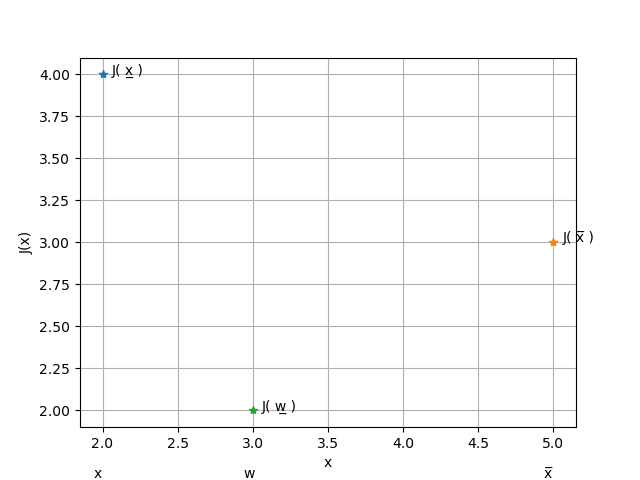

In [11]:
X = np.zeros((3,1))
Y = np.zeros((3,1))

X[:,0] = [2, 5, 3]
Y[:,0] = [4, 3, 2]
wu = "\u0332".join("w ")
Label1 = [xu, xb, wu]
Label2 = ["J( "+xu+")", "J( "+xb+")", "J( "+wu+")"]
plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', X[0], Y[0])

[Back to top](#EEEN30101-Numerical-Analysis)

Based on this information, we know that we should at least have a local minimum within the $[\underline{x}, \bar{x}]$ range.

However, we do not know if the local minimum is on the left or the right of $\underline{w}$ (there could also be multiple local optima within this range):

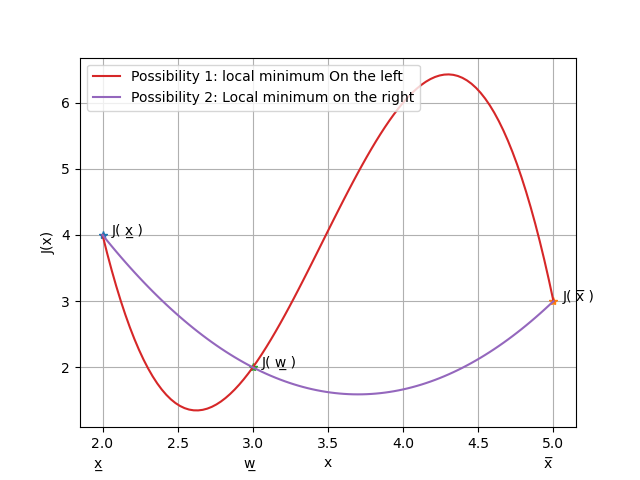

In [12]:
K3 = [78, -220/3, 45/2, -13/6]
K4 = [13, -37/6, 5/6]

x = np.zeros((2,100))
y = np.ones((2,100))
x[0] = np.linspace(2,5,100)
x[1] = np.linspace(2,5,100)
y[0] = polynomial(x[0], K3)
y[1] = polynomial(x[0], K4)

plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', x, y,
                ['Possibility 1: local minimum On the left',
                 'Possibility 2: Local minimum on the right'])

Therefore, we select a new point ($\bar{w}$) and obtain the value of the function at that point $J(\bar{w})$ within the $[\underline{w}, \bar{x}]$ range.

$$\underline{x} < \underline{w} < \bar{w} < \bar{x}$$

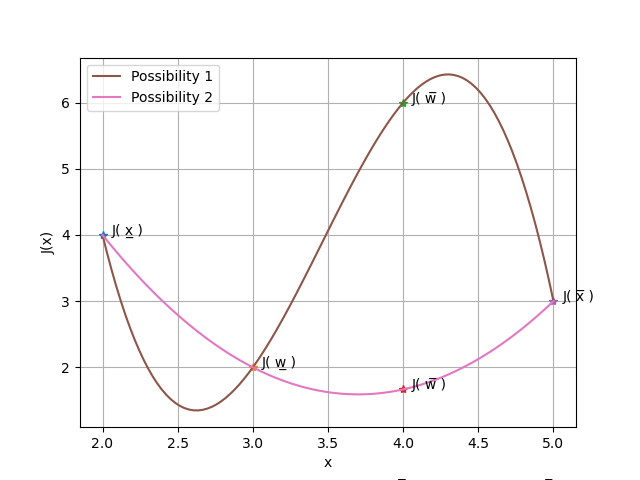

In [13]:
X = np.zeros((5,1))
Y = np.zeros((5,1))
X[:,0] = [2, 3, 4, 4, 5]
Y[:,0] = [4, 2, 6, 5/3, 3]
wb = "\u0305".join("w ")
Label1 = [xu, wu, wb, wb, xb]
Label2 = ["J( "+xu+")", "J( "+wu+")", "J( "+wb+")", "J( "+wb+")", "J( "+xb+")"]
plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', x, y,
                ['Possibility 1', 'Possibility 2'])

[Back to top](#EEEN30101-Numerical-Analysis)

There will be to possible outcomes:
- Possibility 1: 

$\quad$ The local minimum is on the left of $\underline{w}$, i.e., in the $[\underline{x}, \bar{w}]$ range.

$$
\begin{aligned}
  J(\underline{w}) & <  J(\bar{w})\\
   & < J(\underline{x}) \\ 
   & < J(\bar{x})
\end{aligned}
$$

$\quad$ Therefore, we can update our values:
$$ \underline{x}_{k+1} = \underline{x}_k$$
$$ \bar{x}_{k+1} = \bar{w}_k$$
$$ \underline{w}_{k+1} = \text{To be calculated}$$
$$ \bar{w}_{k+1} = \underline{w}_k$$

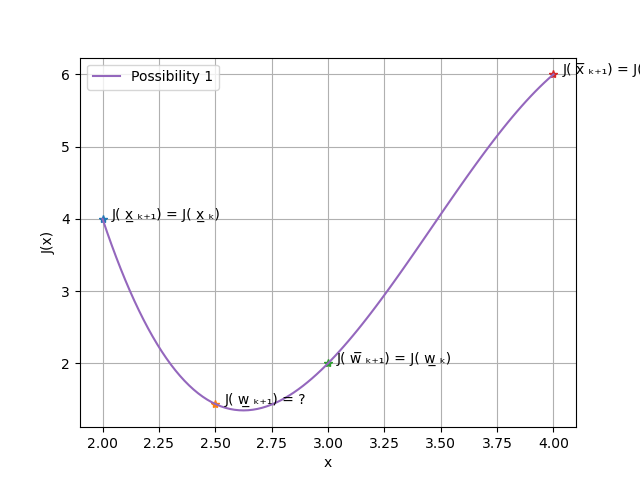

In [14]:
x = np.zeros((1,100))
y = np.ones((1,100))
x[0] = np.linspace(2,4,100)
y[0] = polynomial(x[0], K3)

X = np.zeros((4,1))
Y = np.zeros((4,1))
X[:,0] = [2, 2.5, 3, 4]
Y[:,0] = [4, 1.4375, 2, 6]
Label1 = [xu+"ₖ₊₁="+xu+"ₖ", wu+"ₖ₊₁=?", wb+"ₖ₊₁="+wu+"ₖ", xb+"ₖ₊₁="+wb+"ₖ"]
Label2 = ["J( "+xu+"ₖ₊₁) = J( "+xu+"ₖ)", "J( "+wu+"ₖ₊₁) = ?",
          "J( "+wb+"ₖ₊₁) = J( "+wu+"ₖ)", "J( "+xb+"ₖ₊₁) = J( "+wb+"ₖ)"]

plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', x, y, ['Possibility 1'])

- Possibility 2: 

$\quad$ The local minimum is on the right of $\underline{w}$, i.e., in the $[\underline{w}, \bar{x}]$ range.

$$
\begin{aligned}
  J(\bar{w}) & <  J(\underline{w})\\
   & < J(\underline{x}) \\ 
   & < J(\bar{x})
\end{aligned}
$$

$\quad$ Therefore, we can update our values:
$$ \underline{x}_{k+1} = \underline{w}_k$$
$$ \bar{x}_{k+1} = \bar{x}_k$$
$$ \underline{w}_{k+1} = \bar{w}_k$$
$$ \bar{w}_{k+1} = \text{To be calculated}$$

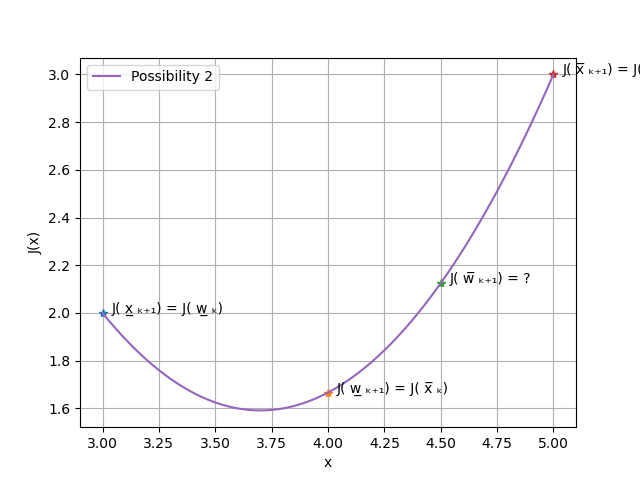

In [15]:
x = np.zeros((1,100))
y = np.ones((1,100))
x[0] = np.linspace(3,5,100)
y[0] = polynomial(x[0], K4)

X = np.zeros((4,1))
Y = np.zeros((4,1))
X[:,0] = [3, 4, 4.5, 5]
Y[:,0] = [2, 5/3, 2.125, 3]
Label1 = [xu+"ₖ₊₁="+wu+"ₖ", wu+"ₖ₊₁="+wb+"ₖ", wb+"ₖ₊₁=?", xb+"ₖ₊₁="+xb+"ₖ"]
Label2 = ["J( "+xu+"ₖ₊₁) = J( "+wu+"ₖ)", "J( "+wu+"ₖ₊₁) = J( "+xb+"ₖ)",
          "J( "+wb+"ₖ₊₁) = ?", "J( "+xb+"ₖ₊₁) = J( "+xb+"ₖ)"]
plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', x, y, ['Possibility 2'])

This procedure can be expressed as an iterative algorithm to find a local optimum within the $[\underline{x}, \bar{x}]$ range.

However, to develop an algorithm, we still need to define the rules to select the most effective values of $\underline{w}$ and $\bar{w}$.

We will use the golden ratio to find effective values for $\underline{w}$ and $\bar{w}$.

[Back to top](#EEEN30101-Numerical-Analysis)

### The golden ratio

 To illustrate how to calculate values for $\underline{w}$ and $\bar{w}$ consider the example presented below, which corresponds to an iteration (i.e., from iteration $k$ to $k+1$) for possibility 2 (i.e., the minimum is on the right side of $\underline{w}_k$).

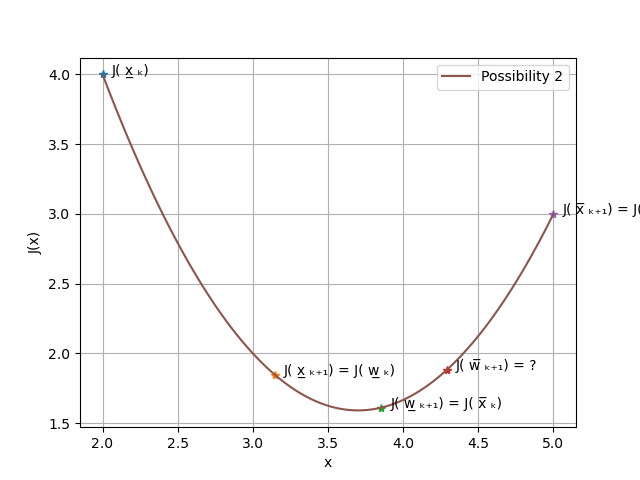

In [16]:
x = np.zeros((1,100))
y = np.ones((1,100))
x[0] = np.linspace(2,5,100)
y[0] = polynomial(x[0], K4)

Xg = np.zeros((5,1))
Y = np.zeros((5,1))
Xg[:,0] = [2, 3.1459, 3.8541, 4.2918, 5]
Y[:,0] = [4, 1.8475, 1.6115, 1.8835, 3]
Label1 = [xu+"ₖ",xu+"ₖ₊₁="+wu+"ₖ", wu+"ₖ₊₁="+wb+"ₖ", wb+"ₖ₊₁=?", xb+"ₖ₊₁="+xb+"ₖ"]
Label2 = ["J( "+xu+"ₖ)","J( "+xu+"ₖ₊₁) = J( "+wu+"ₖ)", "J( "+wu+"ₖ₊₁) = J( "+xb+"ₖ)",
          "J( "+wb+"ₖ₊₁) = ?", "J( "+xb+"ₖ₊₁) = J( "+xb+"ₖ)"]
plotFullFigures(Xg, Y, Label1, Label2, 'x', 'J(x)', x, y, ['Possibility 2'])

We want our selection of $\underline{w}$ and $\bar{w}$ to be symmetrical. That is, we want the distance between $\underline{w}$ and the lower range ($\underline{x}$) to be the same as the distance between $\bar{w}$ and the upper range ($\bar{x}$):

$$\underline{w}_k - \underline{x}_k = \bar{x}_k - \bar{w}_k$$

In [17]:
print(wu+"ₖ - "+xu+"ₖ"+' = %.4f'%(Xg[1,0]-Xg[0,0]))
print(xb+"ₖ - "+wb+"ₖ"+' = %.4f'%(Xg[4,0]-Xg[2,0]))

w̲ ₖ - x̲ ₖ = 1.1459
x̅ ₖ - w̅ ₖ = 1.1459


We want the ratio between these two matching distances and the total range ($\bar{x}-\underline{x}$) to be the same in every iteration. That is:

$$ \frac{\underline{w}_{k+1}-\underline{x}_{k+1}}{\bar{x}_{k+1}-\underline{x}_{k+1}} = \frac{\underline{w}_k-\underline{x}_k}{\bar{x}_k-\underline{x}_k} $$

In [18]:
print("("+wu+"ₖ₊₁ - "+xu+"ₖ₊₁"+")/("+xb+"ₖ₊₁-"+xu+'ₖ₊₁) = %.4f'%((Xg[1,0]-Xg[0,0])/(Xg[4,0]-Xg[0,0])))
print("("+wu+"ₖ - "+xu+"ₖ"+")/("+xb+"ₖ-"+xu+'ₖ) = %.4f'%((Xg[2,0]-Xg[1,0])/(Xg[4,0]-Xg[1,0])))

(w̲ ₖ₊₁ - x̲ ₖ₊₁)/(x̅ ₖ₊₁-x̲ ₖ₊₁) = 0.3820
(w̲ ₖ - x̲ ₖ)/(x̅ ₖ-x̲ ₖ) = 0.3820


Let us now define this ratio as:

$$\frac{\underline{w}_{k+1}-\underline{x}_{k+1}}{\bar{x}_{k+1}-\underline{x}_{k+1}} =  \frac{\underline{w}_k-\underline{x}_k}{\bar{x}_k-\underline{x}_k} = 1 - \tau$$

Our next objective is to calculate the value of $\tau$ for that purpose, we need to rewrite the expressions $\bar{x}_{k+1}-\underline{x}_{k+1}$ and $\underline{w}_{k+1}-\underline{x}_{k+1}$.

For this purpose, define the distance of the full range as $d$:

$$d_k = \bar{x}_k - \underline{x}_k$$

Based on this notation, we show that the distance of the full range will decrease after every iteration as a function of $\tau$:


$$
\begin{aligned}
  \tau d_k & =  \left(1 - \frac{\underline{w}_k-\underline{x}_k}{\bar{x}_k-\underline{x}_k} \right) (\bar{x}_k-\underline{x}_k)\\
   & = \left(\frac{\bar{x}_k-\underline{x}_k-\underline{w}_k+\underline{x}_k}{\bar{x}_k-\underline{x}_k} \right) (\bar{x}_k-\underline{x}_k)\\
   & = \bar{x}_k-\underline{w}_k
\end{aligned}
$$

If you remember that $\bar{x}_{k+1} = \bar{x}_k$ and $ \underline{x}_{k+1}= \underline{w}_k$ (check the figure above if this is unclear), we now have our new expression for $\bar{x}_{k+1}-\underline{x}_{k+1}$:

$$ \bar{x}_{k+1}-\underline{x}_{k+1} = \tau d_k$$

[Back to top](#EEEN30101-Numerical-Analysis)

Now, define the distance between $\underline{w}_k$ and the lower range ($\underline{x}_k$) as follows:

$$
\begin{aligned}
  \underline{w}_k-\underline{x}_k & =  (\bar{x}_k-\underline{x}_k)\frac{\underline{w}_k-\underline{x}_k}{\bar{x}_k-\underline{x}_k}\\
   & = d_k(1 - \tau)
\end{aligned}
$$

Due to symmetry, this is the same distance as $\bar{x}_k-\bar{w}_k$

$$ \bar{x}_k-\bar{w}_k = d_k(1 - \tau)$$

Therefore, $\underline{w}_{k+1}-\underline{x}_{k+1}$ can be calculated as (remember that $\underline{w}_{k+1}=\bar{w}_k$ and $\underline{x}_{k+1} = \underline{w}_k$):

$$
\begin{aligned}
  \underline{w}_{k+1}-\underline{x}_{k+1} & =  d_k - d_k(1-\tau) - d_k(1-\tau)\\
   & = d_k -d_k + d_k\tau - d_k + d_k\tau \\
   & = -d_k + 2d_k\tau \\
   & = (2\tau - 1)d_k
\end{aligned}
$$


We can finally use our new equations for $\bar{x}_{k+1}-\underline{x}_{k+1}$ and $\underline{w}_{k+1}-\underline{x}_{k+1}$ to estimate the value of $\tau$:

$$
\begin{aligned}
  1 - \tau & =  \frac{\underline{w}_{k+1}-\underline{x}_{k+1}}{\bar{x}_{k+1}-\underline{x}_{k+1}}\\
   & = \frac{(2\tau - 1)d_k}{\tau d_k}\\
   & = \frac{2\tau - 1}{\tau} 
\end{aligned}
$$

If we multiply both sides by $\tau$:

$$\tau - \tau^2 = 2\tau -1$$

$$\tau^2 + \tau -1 = 0$$

Solving with the general quadratic equation and taking the positive root, we get:

$$\tau = \frac{-1 + \sqrt{5}}{2} = \frac{1}{\phi}$$

Where $\phi$ is the golden ratio (1.6180).

In [19]:
𝜏1 = 1 - (Xg[1,0]-Xg[0,0])/(Xg[4,0]-Xg[0,0])
𝜏2 = (-1 + math.sqrt(5))/2
𝜏3 = 1/1.6180
print('The value of 𝜏 can be calculated in the following different ways:')
print("1-("+wu+"ₖ₊₁ - "+xu+"ₖ₊₁"+")/("+xb+"ₖ₊₁-"+xu+'ₖ₊₁) \t= %.4f'%𝜏1)
print("(-1+√5)/2                     \t= %.4f"%𝜏2)
print("1/𝜙                           \t= %.4f"%𝜏3)

The value of 𝜏 can be calculated in the following different ways:
1-(w̲ ₖ₊₁ - x̲ ₖ₊₁)/(x̅ ₖ₊₁-x̲ ₖ₊₁) 	= 0.6180
(-1+√5)/2                     	= 0.6180
1/𝜙                           	= 0.6180


[Back to top](#EEEN30101-Numerical-Analysis)

### Algorithm and examples

Now that we have reviewed the characteristics of the golden section search, we can develop the search as the following algorithm

**Algorithm: Golden section search**

`SET Threshold = 0.001`<br/><br/>
`Tau = (-1+sqrt(5))/2`<br/>
`wu = xb - Tau*(xb-xu)`<br/>
`wb = xu + Tau(xb-xu)`<br/><br/>
`WHILE xb - xu > Threshold`
`    IF J(wb) < J(wu)`<br/>
`        xunew = wu`<br/>
`        xbnew = xb`<br/>
`        wunew = wb`<br/>
`        wbnew = wu + Tau*(xb - wu)`<br/>
`    ELSE`<br/>
`        xunew = xu`<br/>
`        xbnew = wb`<br/>
`        wunew = wb - Tau*(wb-xu)`<br/>
`        wbnew = wu`<br/>
`    END IF`<br/>
`    xu = xunew`<br/>
`    xb = xbnew`<br/>
`    wu = wunew`<br/>
`    wb = wbnew`<br/>
`END WHILE`

For convenience, the algorithm is coded in the following python method, which also includes information about the variables at each iteration.

In [20]:
class poly:
    def __init__(self, K):
        '''Initializing class'''
        self.K = K

    def get_value(self, x):
        '''Get value of the function'''

        return polynomial(x, self.K)

def goldenSearch(ex, Xu, Xb, prt=False):
    '''Golden section search'''
    tau = (-1+math.sqrt(5))/2
    Wu = Xb - tau*(Xb-Xu)
    Wb = Xu + tau*(Xb-Xu)
    
    Ju = ex.get_value(Wu)
    Jb = ex.get_value(Wb)
    
    if prt:
        xu = "\u0332".join("x ")
        xb = "\u0305".join("x ")
        wu = "\u0332".join("w ")
        wb = "\u0305".join("w ")
        print("       "+xu+"       "+wu+"       "+wb+"       "+xb+
              "  J( "+wu+")"+"   J( "+wb+")"+"     "+wu+"-"+xu+
              "    "+xb+"-"+wb+"    "+xb+"-"+xu+"   Ratio")    
    Error = 1000
    k = 0
    while Error > 0.0001:
        if prt:
            print('%8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f'
                  %(Xu, Wu, Wb, Xb, Ju, Jb, Wu-Xu, Xb-Wb, Xb-Xu, (Wb-Xu)/(Xb-Xu)))
        if Ju < Jb:
            Xb = Wb
            J1 = Jb
            Wb = Wu
            Jb = Ju
            Wu = Xb - tau*(Xb-Xu)
            Ju = ex.get_value(Wu)
        else:
            Xu = Wu
            J0 = Ju
            Wu = Wb
            Ju = Jb
            Wb = Xu + tau * (Xb-Xu)
            Jb = ex.get_value(Wb)

        if len(Xu) == 1:
            Error = math.sqrt((Wu[0]-Xb[0])**2)
        else:
            Error = math.sqrt((Wu[0]-Xb[0])**2+(Wu[1]-Xb[1])**2)
        
        k += 1
        if k>50:
            print('Golden section search failed after %d iterations'%k)
            Error = 0
    x_star = Wb
    if k <= 50 and prt:
        print('%8.4f %8.4f %8.4f %8.4f'%(Xu, Wu, Wb, Xb))
        print('\nConvereged to %.4f after %d iterations'%(x_star,k))

    return x_star

ex0 = poly(K3)
ex1 = poly(K4)

[Back to top](#EEEN30101-Numerical-Analysis)

Use the python method to solve the examples below and analyse:
- The symmetry of the different values ($\underline{x}$, $\underline{w}$, $\bar{w}$ and $\bar{x}$)
- The constant ratio by which the $\bar{x} - \underline{x}$ range decreases
- If the algorithm finds the solution

The next example applies the method to the $J(x)$ function representing possibility 1.

In [ ]:
@interact
def TestGolden1(Xu = widgets.FloatSlider(min=2, max=5, value=2, description="\u0332".join("x "), continuous_update=False),
               Xb = widgets.FloatSlider(min=2, max=5, value=5, description="\u0305".join("x "), continuous_update=False)):
    if Xu > Xb:
        aux = Xu
        Xu = Xb
        Xb = aux

    Xu = np.matrix(Xu, dtype= np.float64)
    Xb = np.matrix(Xb, dtype= np.float64)
    result = goldenSearch(ex0, Xu, Xb, True)
    result = result.item(0)

    x = np.zeros((1,100))
    y = np.ones((1,100))
    x[0] = np.linspace(Xu.item(0),Xb.item(0),100)
    y[0] = ex0.get_value(x[0])

    X = np.zeros((1,1))
    Y = np.zeros((1,1))
    X[:,0] = result
    Y[:,0] = ex0.get_value([result])
    Label1 = [' ']
    Label2 = ["Local minimum"]
    plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', x, y, ['Possibility 2'])

The next example applies the method to the $J(x)$ function representing possibility 2.

In [ ]:
@interact
def TestGolden2(Xu = widgets.FloatSlider(min=2, max=5, value=2, description="\u0332".join("x "), continuous_update=False),
               Xb = widgets.FloatSlider(min=2, max=5, value=5, description="\u0305".join("x "), continuous_update=False)):
    if Xu > Xb:
        aux = Xu
        Xu = Xb
        Xb = aux

    Xu = np.matrix(Xu, dtype= np.float64)
    Xb = np.matrix(Xb, dtype= np.float64)
    result = goldenSearch(ex1, Xu, Xb, True)
    result = result.item(0)

    x = np.zeros((1,100))
    y = np.ones((1,100))
    x[0] = np.linspace(Xu.item(0),Xb.item(0),100)
    y[0] = ex1.get_value(x[0])

    X = np.zeros((1,1))
    Y = np.zeros((1,1))
    X[:,0] = result
    Y[:,0] = ex1.get_value([result])
    Label1 = [' ']
    Label2 = ["Local minimum"]
    plotFullFigures(X, Y, Label1, Label2, 'x', 'J(x)', x, y, ['Possibility 2'])

Based on the outputs of the examples:
- The values calculated for $\underline{x}$, $\underline{w}$, $\bar{w}$ and $\bar{x}$ are symmetrical:

$$ \underline{w}_k - \underline{x}_k = \bar{x}_k - \bar{w}_k \quad \forall k$$

- The constant ratio by which the $\bar{x} - \underline{x}$ range decreases is constant and equal to $1/\phi$.

$$\frac{1}{\phi} (\bar{x}_k-\underline{x}_k) = \bar{x}_{k+1}-\underline{x}_{k+1}$$

- The golden section search is able to find local optima in the examples provided.


[Back to top](#EEEN30101-Numerical-Analysis)

## Multidimensional quadratic cost

So far, we have been solving problems with a single variable. However, in practice, most problems involve multiple valuables.

Accordingly, in this section, we will be solving multidimensional problems.

### Defining a multidimensional optimisation problem

To illustrate the characteristics of multidimensional optimisation problems, consider our previous example where we were looking for a number of energy efficient light bulbs to minimise our energy costs. 

In practice, if you want to reduce your energy costs, you would not only be looking for one thing (e.g., light bulbs in this example), but instead explore various options available, e.g., efficient heating, house insolation, perhaps PV panels, etc. Some of these options affect each other (e.g., if you have PV you may not need as many energy efficient devices), so you will need to optimise all these variables (options) within a single problem.

Accordingly, in most real life cases, we will be optimising a function $J(\underline{x})$ of a vector ($\underline{x}$). That is:

$$ \underline{x} \in \mathbb{R}^n \quad \text{, i.e., } \quad \underline{x} = \left[ \begin{array}{cc} 
x_1 \\ 
\vdots \\ 
x_n 
\end{array}\right]$$

Note that $J(x)$ will be a scalar:

$$J(\underline{x}) \in \mathbb{R}$$

To optimise the solution to a problem ($J(\underline{x})$), we need to find a point ($\underline{x}*$) that minimises the function ($J(\underline{x}*)$):

$$\underline{x}^* = arg \; \min\limits_{\underline{x} \in \mathbb{R}^n} J(\underline{x})$$

To illustrate this, consider the following function as an example:
$$J(\underline{x}) = \frac{1}{2}\underline{x}^T \underline{\underline{H}}\underline{x} + \underline{f}^T\underline{x}$$

To be able to plot this function, let us only consider $x$ is a vector with two elements:

$$J(x) = \frac{1}{2} [\begin{array}{cc}x_1 & x_2\end{array}] \left[ \begin{array}{cc} H_{1,1} & H_{1,2} \\ H_{2,1} & H_{2,2} \end{array} \right] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] + [\begin{array}{cc} f_1 & f_2\end{array}] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] $$

Specifically, consider:
$$\underline{\underline{H}} = \left[ \begin{array}{cc} 2 & 1 \\ 1 & 2 \end{array} \right]$$

$$ \underline{f} = [\begin{array}{cc} 1 & 1\end{array}] $$

This function looks like this:

In [ ]:
class Example1:
    def __init__(self, H, f):
        '''Initializing function'''
        self.H = H
        self.f = f
        self.No = len(f)
        self.x = np.zeros((self.No+1,1))

    def get_value(self, x):
        '''Get value of the function'''
        J = 0.5 *np.matmul(np.transpose(x),np.matmul(self.H,x)) + \
            np.matmul(np.transpose(self.f),x)
        return J

    def get_optimal(self):
        '''Get optimal value'''
        Hi = np.linalg.inv(self.H)
        self.x[0:self.No] = - np.matmul(Hi, self.f)
        self.x[self.No] = - 0.5 *np.matmul(np.transpose(self.f),np.matmul(Hi,self.f))

        return self.x

def plot3D(ex, T = 20, X=[-5, 5], Y=[-5, 5], prt=False):
    '''Plot 3D scatter'''
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection='3d')

    v1 = np.linspace(X[0], X[1], T)
    v2 = np.linspace(Y[0], Y[1], T)
    x1 = np.zeros((T**2))
    x2 = np.zeros((T**2))
    x3 = np.zeros((T**2))
    x = np.zeros((2, 1))
    k = 0
    for i in range(T):    
        for j in range(T):
            x1[k] = v1[i]
            x2[k] = v2[j]
            x[0] = x1[k]
            x[1] = x2[k]
            x3[k] = ex.get_value(x)
            k+=1
   
    ax.scatter(x1, x2, x3)
    
    x = ex.get_optimal()
    ax.scatter(x.item(0), x.item(1), x.item(2), color='black')
    Dz = min(x3) - (max(x3)-min(x3))*0.1
    ax.text(x.item(0), x.item(1), Dz, "x*", color='black')

    ax.set(xlabel='(x)', ylabel='(y)', zlabel='(z)')
    plt.show()

    if prt:
        print('x* = [%.4f, %.4f, %.4f]'%(x.item(0), x.item(1), x.item(2)))


H = np.matrix('2 1; 1 2')
f = np.matrix('1; 1')
ex1 = Example1(H,f)
plot3D(ex1, 20, [-2, 2], [-2, 2], True)

In [ ]:
aux = []
if aux:
    print(aux)
else:
    print('is empty')

The 3D plot may be difficult to understand, so an alternative figure (contour plot) is also provided.

In [ ]:
def plotContour(ex, delta = 1, X=[-5, 5], Y=[-5, 5], prt=False, L=[], P=[]):
    '''Contour plot'''
    x = np.arange(X[0], X[1], delta)
    y = np.arange(Y[0], Y[1], delta)
    x, y = np.meshgrid(x, y)

    s = x.shape
    z = np.zeros((s), dtype = np.float64)
    for i in range(s[0]):
        for j in range(s[1]):
            z[i, j] = ex.get_value(np.transpose(np.matrix([x[i,j],y[i,j]], dtype = np.float64)))

    fig, ax = plt.subplots()
    CS = ax.contour(x, y, z)
    ax.clabel(CS, inline=True, fontsize=10)

    if len(L)>0:  # Adding lines (e.g. barrier functions)
        ax.plot([L[0,0], L[0,1]], [L[1,0], L[1,0]], color='black')
        ax.plot([L[0,0], L[0,1]], [L[1,1], L[1,1]], color='black')
        ax.plot([L[0,0], L[0,0]], [L[1,0], L[1,1]], color='black')
        ax.plot([L[0,1], L[0,1]], [L[1,0], L[1,1]], color='black')

    Dx = (X[1]-X[0])*0.04
    if len(P)>0:  # Adding points (e.g., constrained optimal point)
        ax.scatter(P.item(0), P.item(1), color='blue')
        ax.text(P.item(0)+Dx, P.item(1), "x*", color='blue')

    x_star = ex.get_optimal()
    ax.scatter(x_star.item(0), x_star.item(1), color='black')
    ax.text(x_star.item(0)-Dx, x_star.item(1), "x*", color='black')
    if prt:
        print('x* = [%.4f, %.4f, %.4f]'%(x_star.item(0), x_star.item(1), x_star.item(2)))
    plt.show()

plotContour(ex1, 0.1, [-2, 2], [-2, 2], True)

[Back to top](#EEEN30101-Numerical-Analysis)

Note that $H$ is a square matrix ($2x2$ in this example) and also symmetric and positive definite:

- The symmetry condition means that $\underline{\underline{H}}=\underline{\underline{H}}^T$ (i.e., $H_{i,j} = H_{j,i}$) and the Eigen values are real.

In [ ]:
print('Checking symmetry of H:')
for i in range(2):
    for j in range(2):
        if i != j:
            print('H[%d][%d] = H[%d][%d], i.e., (%.2f = %.2f)'
                  %(i+1,j+1,j+1,i+1,ex1.H[i,j],ex1.H[j,i]))

In [ ]:
print('Checking egenvalues = ')
print(np.linalg.eigvals(ex1.H))

- The positive definite condition means that, for any $x \neq 0$, $\underline{x}^T\underline{\underline{H}}\underline{x}>0$, which implies that all Eigen values are greater than zero (see Eigen values above) and $\underline{\underline{H}}$ can be inverted (i.e., $\underline{\underline{H}}^{-1}$ exists).

In [ ]:
print('Checking H can be inverted:')
print('H^-1 = \n', np.linalg.inv(ex1.H))

To optimise the solution to this problem, let us first define the gradient of the function (i.e., differential of $J(\underline{x})$ with respect to $\underline{x}$).

$$\bigtriangledown J(\underline{x}) = \underline{\underline{H}}\underline{x}+\underline{f}$$

[Back to top](#EEEN30101-Numerical-Analysis)

### Deriving the gradient equation

#### Formulation for a 2x2 system

If the derivation of the $\bigtriangledown J(\underline{x})$ equation is unclear for you, remember that the example ($J(x_1, x_2)$) can be developed as follows:

$$
\begin{aligned}
  J(\underline{x}) = J(x_1, x_2) & = \frac{1}{2} [\begin{array}{cc}x_1 & x_2\end{array}] \left[ \begin{array}{cc} H_{1,1} & H_{1,2} \\ H_{2,1} & H_{2,2} \end{array} \right] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] + [\begin{array}{cc} f_1 & f_2\end{array}] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] \\
   & = \frac{1}{2} \left[ \begin{array}{cc} H_{1,1}x_1+H_{2,1}x_2 & H_{1,2}x_1+H_{2,2}x_2\end{array} \right] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] + [\begin{array}{cc} f_1 & f_2\end{array}] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right]\\ 
   & = \frac{H_{1,1}x_1+H_{2,1}x_2}{2}x_1 + \frac{H_{1,2}x_1+H_{2,2}x_2}{2}x_2 + [\begin{array}{cc} f_1 & f_2\end{array}] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] \\
   & = \frac{H_{1,1}x_1+H_{2,1}x_2}{2}x_1 + \frac{H_{1,2}x_1+H_{2,2}x_2}{2}x_2 + f_1x_1 + f_2x_2\\
   & = \frac{H_{1,1}}{2}x_1^2 + \frac{H_{2,1}}{2}x_1x_2 + \frac{H_{1,2}}{2}x_1x_2 + \frac{H_{2,2}}{2}x_2^2 + f_1x_1 + f_2x_2 \\
   & = \frac{H_{1,1}}{2}x_1^2 + \frac{H_{2,1}+H_{1,2}}{2}x_1x_2 + \frac{H_{2,2}}{2}x_2^2 + f_1x_1 + f_2x_2
\end{aligned}
$$

Now that we have the developed equation, we need its partial derivatives (i.e., gradients) with respect to $x_1$ and $x_2$.

- Let us first get the derivative of the equation with respect to $x_1$. Remember that $\partial x_1/ \partial x_1 = 1$ and $\partial x_2/ \partial x_1 = 0$:

$$
\begin{aligned}
  \bigtriangledown J(\underline{x})_1 = \frac{\partial J(x_1, x_2)}{\partial x_1} &  = \frac{\partial 0.5H_{1,1}x_1^2}{\partial x_1} +\frac{\partial 0.5(H_{2,1}+H_{1,2}) x_1x_2}{\partial x_1} + \frac{\partial H_{2,2}x_2^2}{\partial x_1} + \frac{\partial f_1x_1}{\partial x_1} + \frac{\partial f_2x_2}{\partial x_1} \\
   & = H_{1,1}x_1 + 0.5 (H_{2,1}+H_{1,2})x_2 + 0 + f_1 + 0 \\
   & = H_{1,1}x_1 + 0.5(H_{2,1}+H_{1,2})x_2 + f_1
\end{aligned}
$$

$\quad$ As our $H$ matrix is symmetric, $H_{2,1}$ can be replaced with $H_{1,2}$, which allow us to simplify the equation to:

\begin{aligned}
  \frac{\partial J(x_1, x_2)}{\partial x_1} & = H_{1,1}x_1 + 0.5(H_{1,2}+H_{1,2})x_2 + f_1 \\
   &  = H_{1,1}x_1 + H_{1,2}x_2 + f_1
\end{aligned}

- Let us now get the derivative of the equation with respect to $x_1$. Remember that $\partial x_1/ \partial x_2 = 0$ and $\partial x_2/ \partial x_2 = 1$:

$$
\begin{aligned}
  \bigtriangledown J(\underline{x})_2 = \frac{\partial J(x_1, x_2)}{\partial x_2} &  = \frac{\partial 0.5H_{1,1}x_1^2}{\partial x_2} +\frac{\partial 0.5(H_{2,1}+H_{1,2}) x_1x_2}{\partial x_2} + \frac{\partial H_{2,2}x_2^2}{\partial x_2} + \frac{\partial f_1x_1}{\partial x_2} + \frac{\partial f_2x_2}{\partial x_2} \\
   & = 0 + 0.5(H_{2,1}+H_{1,2})x_1 + H_{2,2}x_2 + 0 + f_2 \\
   & = 0.5(H_{2,1}+H_{1,2})x_1 + H_{2,2}x_2 + f_2
\end{aligned}
$$

$\quad$ Again, based on symmetry $H_{2,1} = H_{1,2}$, which allows us to simplify the equation to:

\begin{aligned}
  \frac{\partial J(x_1, x_2)}{\partial x_2} & = 0.5(H_{2,1}+H_{2,1})x_1 + H_{2,2}x_2 + f_2 \\
  & = H_{2,1}x_1 + H_{2,2}x_2 + f_2
\end{aligned}

Rewriting the equations in matrix form, we get:

$$
\begin{aligned}
  \bigtriangledown J(\underline{x}) = \left[ \begin{array}{c} \partial J(x_1, x_2)/\partial x_1 \\ \partial J(x_1, x_2)/\partial x_2 \end{array} \right] &  = \left[ \begin{array}{c} H_{1,1}x_1 + H_{1,2}x_2 + f_1 \\ H_{2,1}x_1 + H_{2,2}x_2 + f_2 \end{array} \right] \\
   & = \left[ \begin{array}{c} H_{1,1}x_1 + H_{1,2}x_2 \\ H_{2,1}x_1 + H_{2,2}x_2 \end{array} \right] + \left[ \begin{array}{c} f_1 \\ f_2 \end{array} \right] \\
   & = \left[ \begin{array}{cc} H_{1,1} & H_{1,2} \\ H_{2,1} & H_{2,2} \end{array} \right] \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right] + \left[ \begin{array}{c} f_1 \\ f_2 \end{array} \right] \\
   & = \underline{\underline{H}}\underline{x}+\underline{f}
\end{aligned}
$$

#### Formulation for a nxn system

We have now demonstrated that $\bigtriangledown J(\underline{x}) = \underline{\underline{H}}\underline{x}+\underline{f}$ is true for our $2x2$ example. We can follow a similar approach to demonstrate that the equation is true for $nxn$ systems.

$$ J(\underline{x}) = \frac{1}{2} \sum_{j=1}^{n}{\sum_{k=1}^{n}{x_jH_{j,k}x_k}} + \sum_{j=1}^{n}{f_jx_j}$$

Now that we have the general equation, we can define its derivatives (i.e., gradients) as follows:

$$
\begin{aligned}
  \bigtriangledown J(\underline{x})_i & = \frac{\partial }{\partial x_i} \left( \frac{1}{2} \sum_{j=1}^{n}{\sum_{k=1}^{n}{x_jH_{j,k}x_k}} + \sum_{j=1}^{n}{f_jx_j} \right) \\
   & = \frac{1}{2} \sum_{j=1}^{n}{\sum_{k=1}^{n}{ \left( \frac{\partial x_j}{\partial x_i} H_{j,k}x_k + x_j H_{j,k} \frac{\partial x_k}{\partial x_i}  \right) } } + \sum_{j=1}^{n}{f_j \frac{\partial x_j}{\partial x_i} }
\end{aligned}
$$

Let us define $\delta_{i,j} = \partial x_i/ \partial x_j$, which allows us to rewrite the equation as follows:

$$ \bigtriangledown J(\underline{x})_i = \frac{1}{2} \sum_{j=1}^{n}{\sum_{k=1}^{n}{ \left( \delta_{j,i} H_{j,k}x_k + x_j H_{j,k} \delta_{k,i}  \right) } } + \sum_{j=1}^{n}{f_j \delta_{j,i} }$$

Considering that $\delta_{i,j}$ will be $1$ for $i=j$ and $0$ otherwise, we can conclude that:

$$ \sum_{j=1}^{n}{\sum_{k=1}^{n}{ \delta_{j,i} H_{j,k}x_k  } }  = \sum_{k=1}^{n}{H_{i,k}x_k} \quad \text{because} \; \delta_{j,i} = 1 \; \text{ only when} \; j=i$$

$$ \sum_{j=1}^{n}{\sum_{k=1}^{n}{ x_j H_{j,k} \delta_{k,i} } }  = \sum_{k=1}^{n}{x_jH_{j,i}}  \quad \text{because} \; \delta_{k,i} = 1 \; \text{ only when} \; k=i$$

$$ \sum_{j=1}^{n}{f_j \delta_{j,i}} = f_i  \quad \text{because} \; \delta_{j,i} = 1 \; \text{ only when} \; j=i$$

Therefore:

$$
\begin{aligned}
  \bigtriangledown J(\underline{x})_i & = \frac{1}{2} \sum_{j=1}^{n}{\sum_{k=1}^{n}{ \left( \delta_{j,i} H_{j,k}x_k + x_j H_{j,k} \delta_{k,i}  \right) } } + \sum_{j=1}^{n}{f_j \delta_{j,i} }\\
   & = \frac{1}{2}\sum_{k=1}^{n}{H_{i,k}x_k} + \frac{1}{2}\sum_{k=1}^{n}{x_jH_{j,i}} + f_i
\end{aligned}
$$

Finally, due to the symmetry of $\underline{\underline{H}}$ we can deduce that:

$$ \sum_{k=1}^{n}{H_{i,k}x_k} = \sum_{k=1}^{n}{x_jH_{j,i}} $$

This allow is to demonstrate that:
$$
\begin{aligned}
  \bigtriangledown J(\underline{x})_i & = \frac{1}{2}\sum_{k=1}^{n}{H_{i,k}x_k} + \frac{1}{2}\sum_{k=1}^{n}{H_{i,k}x_k} + f_i \\
  & = \sum_{k=1}^{n}{H_{i,k}x_k} + f_i \\
  & = [ \underline{\underline{H}}\underline{x}+\underline{f}]_i
\end{aligned}
$$

That is:

$$\bigtriangledown J(\underline{x}) = \underline{\underline{H}}\underline{x}+\underline{f}$$

[Back to top](#EEEN30101-Numerical-Analysis)

### Solving the multidimensional problem

To solve the multidimensional problem, we will use its gradient function, which we just developed above.

As a reminder, to find a local optimum ($\underline{x}*$), we need to find a solution that causes the gradient to be zero:

$$\bigtriangledown J(\underline{x}^*) = \underline{\underline{H}}\underline{x}^*+\underline{f} = 0$$

Solving the equation for $\underline{x}^*$, we get ($\underline{\underline{H}}^{-1}$ must exist):

$$\underline{\underline{H}}\underline{x}^*+\underline{f} = 0$$

$$\underline{\underline{H}}\underline{x}^* = - \underline{f}$$

$$\underline{x}^* = - \underline{\underline{H}}^{-1} \underline{f}$$

Due to the ***simplicity*** of this example, the optimal value of $J(x^*)$ can be obtained by completing the square as done below:

$$
\begin{aligned}
  J(\underline{x}) & = \frac{1}{2}\underline{x}^T \underline{\underline{H}}\underline{x} + \underline{f}^T\underline{x}\\
  & = \frac{1}{2} \left( \underline{x}^T \underline{\underline{H}}\underline{x} + \underline{x}^T\underline{f} + \underline{f}^T\underline{x} \right) \\
  & = \frac{1}{2} \left( \underline{x}^T \underline{\underline{H}}\underline{x} + \underline{x}^T\underline{f} + \underline{f}^T\underline{x} + \underline{f}^T\underline{\underline{H}}^{-1}\underline{f} \right) - \frac{1}{2}\underline{f}^T\underline{\underline{H}}^{-1}\underline{f}\\
  & = \frac{1}{2} \left( \underline{x}^T \underline{\underline{H}}\underline{\underline{H}}^{-1} \underline{\underline{H}}\underline{x} + \underline{x}^T\underline{\underline{H}}\underline{\underline{H}}^{-1}\underline{f} + \underline{f}^T \underline{\underline{H}}^{-1}\underline{\underline{H}} \underline{x} + \underline{f}^T\underline{\underline{H}}^{-1}\underline{f} \right) - \frac{1}{2}\underline{f}^T\underline{\underline{H}}^{-1}\underline{f} \\
  & = \frac{1}{2} (\underline{\underline{H}}\underline{x} + \underline{f})^T (\underline{\underline{H}}^{-1}\underline{\underline{H}}\underline{x} + \underline{\underline{H}}^{-1}\underline{f}) - \frac{1}{2} \underline{f}^T \underline{\underline{H}}^{-1} \underline{f} \\
  & = \frac{1}{2} (\underline{\underline{H}}\underline{x} + \underline{f})^T \underline{\underline{H}}^{-1}(\underline{\underline{H}}\underline{x} + \underline{f}) - \frac{1}{2} \underline{f}^T \underline{\underline{H}}^{-1} \underline{f}
\end{aligned}
$$

Considering that, at the optimal solution $\underline{\underline{H}}\underline{x}^*+\underline{f} = 0$:

$$
\begin{aligned}
  J(\underline{x}^*) & = \frac{1}{2} (0)^T \underline{\underline{H}}^{-1}(0) - \frac{1}{2} \underline{f}^T \underline{\underline{H}}^{-1} \underline{f} \\
  & = - \frac{1}{2} \underline{f}^T \underline{\underline{H}}^{-1} \underline{f}
\end{aligned}
$$


We can now use the equations above to find the optimal solution of our simple example:

$$ \left[ \begin{array}{c} x_1^* \\ y_1^* \end{array} \right] = - \left[ \begin{array}{cc} H_{1,1} & H_{1,2} \\ H_{2,1} & H_{2,2} \end{array} \right]^{-1} \left[ \begin{array}{c} f_1 \\ f_2 \end{array} \right]$$

$$ J(x_1^*,x_2^*) = - \frac{1}{2} [\begin{array}{cc} f_1 & f_2 \end{array}] \left[ \begin{array}{cc} H_{1,1} & H_{1,2} \\ H_{2,1} & H_{2,2} \end{array} \right]^{-1} \left[ \begin{array}{c} f_1 \\ f_2 \end{array} \right]$$



In [ ]:
print('The optmal point is:')
Hi = np.linalg.inv(ex1.H)
Xs = - np.matmul(Hi, ex1.f)
Js = - 0.5 *np.matmul(np.transpose(ex1.f),np.matmul(Hi,ex1.f))
print('x* = [%.4f, %.4f, %.4f]'%(Xs[0], Xs[1], Js))

The problem can also be solved using an iterative approach. For this purpose let us rewrite the equation for $x^*$ as follows:

$$
\begin{aligned}
  \underline{x}^* & = - \underline{\underline{H}}^{-1} \underline{f} \\
  & = \underline{x} - \underline{x} - \underline{\underline{H}}^{-1} \underline{f} \\
  & = \underline{x} - \underline{\underline{H}}^{-1}\underline{\underline{H}}\underline{x} - \underline{\underline{H}}^{-1} \underline{f} \\
  & = \underbrace{\underline{x} - \underline{\underline{H}}^{-1}(\underline{\underline{H}} \underline{x}+\underline{f})} \quad \text{for any} \; \underline{x} \\
  & \quad \quad \; \text{Newton step}
\end{aligned}
$$

This equation is equivalent to Newton's method, where the matrix $\underline{\underline{H}}$ is the Hessian of $J(\underline{x})$:

$$ H_{i,j} = \frac{\partial^2J(\underline{x})}{\partial x_i\partial x_j} $$

To demonstrate this, let us first retake our previous equations for $\bigtriangledown J(\underline{x})_i$
$$
\begin{aligned}
  \bigtriangledown J(\underline{x})_i & = \frac{\partial J(\underline{x})}{\partial x_i} \\
   & = \left[ \underline{\underline{H}}\underline{x}+\underline{f} \right]_i\\
   & = \sum_{k=1}^{n}{H_{i,k}x_k} + f_i
\end{aligned}
$$


We can differentiate this equation with respect to $x_j$ to obtain the Hessian:

$$
\begin{aligned}
  \frac{\partial \bigtriangledown J(\underline{x})_i}{\partial x_j} & = \frac{\partial J(\underline{x})}{\partial x_i \partial x_j} \\
   & = \frac{\partial}{\partial x_j}\left[ \underline{\underline{H}}\underline{x}^*+\underline{f} \right]_i\\
   & = \frac{\partial}{\partial x_j} \left[ \sum_{k=1}^{n}{H_{i,k}x_k} + f_i \right] \\
   & = \sum_{k=1}^{n}{H_{i,k} \delta_{j,k}} + 0 \\
   & = H_{i,j} = H_{j,i} \quad \text{due to symmetry}
\end{aligned}
$$

Use the following python method to find the optimal solution to the problem based on Newton's method:

In [ ]:
@interact
def TestNewton2(x1 = widgets.FloatSlider(value=10, description='x1: ', continuous_update=False),
               x2 = widgets.FloatSlider(value=10, description='x1: ', continuous_update=False)):
    
    print('Initial guesses:',x1, x2)
    Error = 1000
    x = np.matrix(str(x1)+'; '+str(x2))
    k = 0
    
    Hi = np.linalg.inv(ex1.H)
    while Error > 0.0001:
        k += 1
        x = x - np.matmul(Hi, np.matmul(ex1.H,x)+ex1.f)
        Error = max(np.matmul(ex1.H,x)+ex1.f)
    
    print('x* = [%.4f, %.4f]'%(x.item(0), x.item(1)))
    print('Converged after %d iterations'%k)
    

><mark>A single newton step is needed to solve this problem because the gradient is linear</mark>

[Back to top](#EEEN30101-Numerical-Analysis)

## Conclusion

At the end of this week's lecture and after going through this notebook, you should be able to address the following questions:<br/>
      
- Introduction to optimisation<br/>
      - What is an optimisation problem?<br/>
      - What are local and global optimum solutions?<br/><br/>
- Golden section search<br/>
      - How do you do a golden section search?<br/>
      - What are the characteristics of the golden section search?<br/><br/>
- Multidimensional quadratic cost<br/>
      - How do you solve multidimensional problems?<br/>
      - How can you apply Newton’s method to multidimensional problems?<br/>

If you cannot answer these questions, you may want to check again this notebook and the lecture notes. 

Also remember that you will need to check this (Part01) and the next notebooks (Part02) to covers this week's materials.

[Back to top](#EEEN30101-Numerical-Analysis)